In [2]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns

In [8]:
df=pd.read_csv("FB.csv")
df.head()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
0,246675545449582_1649696485147474,529,512,262,432,92,3,1,1,0,0,0,0
1,246675545449582_1649426988507757,150,0,0,150,0,0,0,0,0,0,1,0
2,246675545449582_1648730588577397,227,236,57,204,21,1,1,0,0,0,0,0
3,246675545449582_1648576705259452,111,0,0,111,0,0,0,0,0,0,1,0
4,246675545449582_1645700502213739,213,0,0,204,9,0,0,0,0,0,1,0


In [9]:
df.drop(['status_id'],inplace=True, axis=1)
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
0,529,512,262,432,92,3,1,1,0,0,0,0
1,150,0,0,150,0,0,0,0,0,0,1,0
2,227,236,57,204,21,1,1,0,0,0,0,0
3,111,0,0,111,0,0,0,0,0,0,1,0
4,213,0,0,204,9,0,0,0,0,0,1,0


In [18]:
from scipy.stats import zscore

In [20]:
df1=df.apply(zscore)

In [22]:
df1

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,-0.094957,-1.245993,-0.233666
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,-0.094957,0.802573,-0.233666
2,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748,-0.094957,-1.245993,-0.233666
3,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,-0.094957,0.802573,-0.233666
4,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748,-0.094957,0.802573,-0.233666
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,-0.305057,-0.252206,-0.304144,-0.280445,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,-0.094957,0.802573,-0.233666
7046,-0.462863,-0.252206,-0.304144,-0.447319,-0.293436,-0.147879,0.076713,-0.152587,-0.155748,-0.094957,0.802573,-0.233666
7047,-0.493128,-0.252206,-0.304144,-0.476244,-0.293436,-0.147879,-0.176010,-0.152587,-0.155748,-0.094957,0.802573,-0.233666
7048,0.261316,-0.238717,-0.136959,0.298053,-0.268417,-0.147879,-0.176010,-0.152587,-0.155748,-0.094957,0.802573,-0.233666


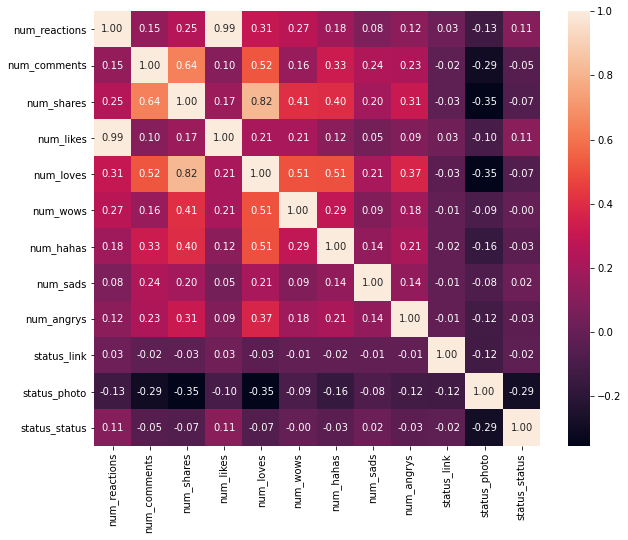

In [23]:
#Check for presence of correlations
plt.figure(figsize = (10,8))
sns.heatmap(df1.corr(), annot=True,fmt='.2f');

In [29]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df1)
p_value

0.0

In [30]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df1)
kmo_model

C:\Anaconda3\lib\site-packages\factor_analyzer\utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.18907653012040246

In [34]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=6, random_state=123)
pca_transformed = pca.fit_transform(df1)

In [35]:
pca.components_

array([[ 0.29363054,  0.34749787,  0.44325444,  0.2517696 ,  0.46125508,
         0.29634039,  0.30885435,  0.16313058,  0.23724676, -0.00138341,
        -0.23261371,  0.01379735],
       [ 0.60664114, -0.230746  , -0.20491048,  0.6406539 , -0.16591724,
         0.01626203, -0.13903343, -0.11041549, -0.12687418,  0.06418546,
         0.03655064,  0.21318874],
       [ 0.11200241, -0.087548  , -0.00392859,  0.10570202,  0.05181555,
         0.21154873,  0.101801  , -0.04987934,  0.08923166, -0.23521304,
         0.64341911, -0.65653464],
       [ 0.00104601, -0.01595734,  0.03483879, -0.00173808,  0.03336338,
         0.03375172,  0.01780145, -0.25206584, -0.042459  ,  0.89259956,
        -0.07188694, -0.35877103],
       [ 0.08189114,  0.1862877 , -0.06986598,  0.1020903 , -0.13942737,
        -0.37729947, -0.13429183,  0.81640504,  0.12355741,  0.20996813,
         0.11148599, -0.15861432],
       [-0.08520722, -0.43754044, -0.19674073, -0.09669555, -0.00487   ,
         0.37224941,  

In [36]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([3.596288  , 1.78479109, 1.2511225 , 1.02089676, 0.95528279,
       0.84959164])

In [37]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.29964816, 0.14871149, 0.10424542, 0.08506266, 0.07959561,
       0.07078926])